# 연습 : 영화 평점
파일 : rating.csv

## 1. 파일 읽어 들이기

In [9]:
# rating.csv 파일의 내용을 확인하고
# numpy 의 array 로 읽어 들어와 arr_rating 이라는 변수에 담습니다.
# 읽어온뒤 내용도 확인합니다
# userid, movieid, rating - 유저가 영화에매긴 평가 점수

In [12]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datas = np.loadtxt('rating.csv',delimiter=',')
datas

array([[1.000e+00, 2.000e+00, 3.500e+00],
       [1.000e+00, 2.900e+01, 3.500e+00],
       [1.000e+00, 3.200e+01, 3.500e+00],
       ...,
       [7.020e+02, 1.377e+03, 1.500e+00],
       [7.020e+02, 1.378e+03, 1.500e+00],
       [7.020e+02, 1.380e+03, 3.500e+00]])

## 2.데이터 탐색하기

In [11]:
# arr_rating 의 
# A) 데이터 개수, 차원 정보등을 확인해봅니다.
# B)  0 ~ 4번째 row만 출력해봅니다
# C)  0번째 칼럼(열)만 출력

In [31]:
# 데이터 개수, 행데이터 개수, 차원 정보
datas.size, len(datas) , datas.ndim

(300000, 100000, 2)

In [4]:
# 5개 row만 출력
datas[:5,:]

array([[ 1. ,  2. ,  3.5],
       [ 1. , 29. ,  3.5],
       [ 1. , 32. ,  3.5],
       [ 1. , 47. ,  3.5],
       [ 1. , 50. ,  3.5]])

In [6]:
# 5개 row만 출력
datas[-5:,:]

array([[ 702. , 1373. ,    3. ],
       [ 702. , 1374. ,    2.5],
       [ 702. , 1377. ,    1.5],
       [ 702. , 1378. ,    1.5],
       [ 702. , 1380. ,    3.5]])

In [51]:
# 0번째 컬럼만 출력
user = datas[:,0].astype('int')

<BarContainer object of 702 artists>

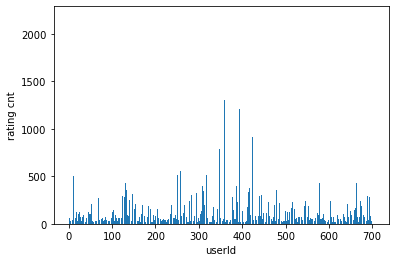

In [52]:
# 유저 분포

user = reduce(
    lambda result, element: result.update({element : result.get(element, 0) + 1}) or result,
    user,
    {}
)

plt.xlabel('userId')
plt.ylabel('rating cnt')
plt.bar(user.keys(),user.values())


In [32]:
# 평점이 매겨진 데이터 수 세기
len(datas[:,1:3])

100000

In [54]:
datas[:,1].max() # 영화 id 끝자락

128594.0

<BarContainer object of 8227 artists>

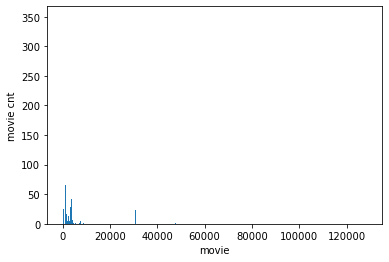

In [53]:
# 영화 분포
mov = reduce(
    lambda result, e: result.update({e : result.get(e,0) + 1}) or result,
    datas[:,1].astype('int'),
    {}
)
plt.xlabel('movie')
plt.ylabel('movie cnt')
plt.bar(mov.keys(), mov.values())

## 3. 영화의 개수 구하기

In [12]:
# 평점이 매겨진 영화의 개수를 구해보세요

In [39]:
d = datas[datas[:,2] > 0] #평점이 매겨진 데이터 수
# 데이터 row 수가 같은걸 보면 평점이 안매겨진 데이터는 없음

In [40]:
d = set(d[:,1])
len(d) # 평점이 매겨진 데이터 중에서 영화만 set으로 추려서 영화 개수를 셈

8227

## 4. 1번 유저에 대한 모든 평점 정보 구하기

In [14]:
# 1번 유저의 '평점 개수' 와 '평점 평균' 을 구하세요

In [46]:
d = datas[datas[:,0].astype('int') == 1]
len(d[d[:,2]>0]), d[:,2].mean() 

(175, 3.742857142857143)

## 5. 각 유저별 정보 구하기

In [16]:
# 각 유저별
# 유저 아이디, 평점회수, 평점 평균
# 아래와 같이 list 로 출력

"""
[[1, 175, 3.742857142857143],
 [2, 61, 4.0],
 [3, 187, 4.122994652406417],
 [4, 28, 3.5714285714285716],
 [5, 66, 4.2727272727272725],
 [6, 24, 3.75],
 ...
 ...
"""
None

In [50]:
# 0번째 컬럼만 출력 후 id 값 하나만 가져오기
user = list(set(datas[:,0].astype('int')))
user.sort()

[
    [i, len(datas[datas[:,0].astype('int') == i]), datas[datas[:,0].astype('int') == i][:,2].mean()]
    for i in user
]

[[1, 175, 3.742857142857143],
 [2, 61, 4.0],
 [3, 187, 4.122994652406417],
 [4, 28, 3.5714285714285716],
 [5, 66, 4.2727272727272725],
 [6, 24, 3.75],
 [7, 276, 3.289855072463768],
 [8, 70, 3.8],
 [9, 35, 3.057142857142857],
 [10, 38, 3.8947368421052633],
 [11, 504, 3.945436507936508],
 [12, 36, 3.5277777777777777],
 [13, 62, 3.725806451612903],
 [14, 243, 3.751028806584362],
 [15, 49, 3.204081632653061],
 [16, 60, 3.5166666666666666],
 [17, 26, 4.038461538461538],
 [18, 121, 3.6115702479338845],
 [19, 50, 3.84],
 [20, 28, 3.4285714285714284],
 [21, 163, 3.705521472392638],
 [22, 133, 3.593984962406015],
 [23, 102, 3.9411764705882355],
 [24, 506, 3.3320158102766797],
 [25, 121, 3.6198347107438016],
 [26, 61, 3.4918032786885247],
 [27, 69, 3.847826086956522],
 [28, 32, 2.8125],
 [29, 177, 3.4915254237288136],
 [30, 31, 2.8870967741935485],
 [31, 246, 3.3760162601626016],
 [32, 73, 3.452054794520548],
 [33, 50, 3.3],
 [34, 93, 3.860215053763441],
 [35, 195, 4.248717948717949],
 [36, 20, 